# Pump Time Series Analysis using prophet and Abili

## Installing libraries

In [ ]:
!pip install prophet

In [ ]:
!pip install ruptures alibi_detect

In [ ]:
!pip install statsmodels

In [ ]:
!pip install pycaret

## Importing required files and libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from utils import plot_sensors, alibi_anomaly_detection, train_pycaret_anomaly_model, make_pycaret_chart, calculate_accuracy

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Read dataset...


## Performing Analysis

In [2]:
sensor_timestamp = "timestamp"
df = pd.read_csv("datasets/sensor.csv", parse_dates=[sensor_timestamp], index_col= sensor_timestamp)
df = df.drop("Unnamed: 0", axis=1)
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

calc_percent_NAs(df).head(10)

,percent
sensor_15,1.000000
sensor_50,0.349569
sensor_51,0.069821
sensor_00,0.046333
sensor_07,0.024741
sensor_08,0.023180
sensor_06,0.021777
sensor_09,0.020856
sensor_01,0.001675
sensor_30,0.001185


### Standard Anomaly analysis

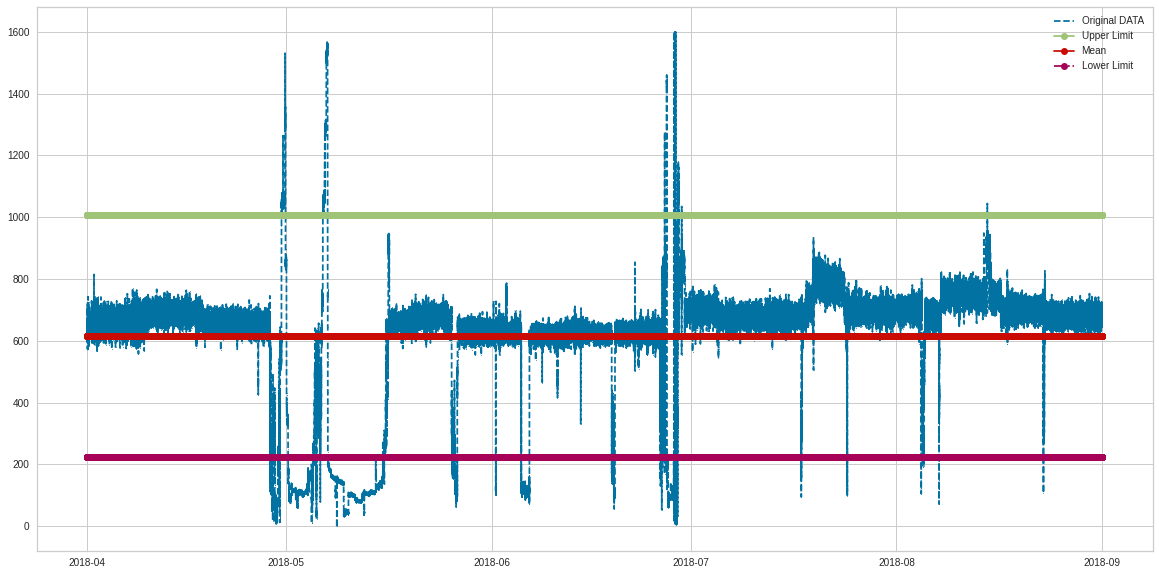

In [30]:
sensor_selected = "sensor_30"
temp_df = df[["sensor_30", "machine_status"]]

std = np.std(df[sensor_selected])
mean = np.mean(df[sensor_selected])
upper_limit = [mean + 2 * std] * len(df[sensor_selected])
lower_limit = [mean - 2 * std] * len(df[sensor_selected])
# print(upper_limit, lower_limit, mean, std)
plt.figure(figsize=(20,10))
plt.plot_date(df.index, df[sensor_selected], linestyle='--', markersize=0.7, label='Original DATA')
plt.plot_date(df.index, upper_limit, linestyle='-', label="Upper Limit")
plt.plot_date(df.index, [mean]*len(df[sensor_selected]), linestyle='-', label = "Mean")
plt.plot_date(df.index, lower_limit, linestyle='-.', label="Lower Limit")

plt.legend()

* Plotting the data with machine status - Recovering and Broken

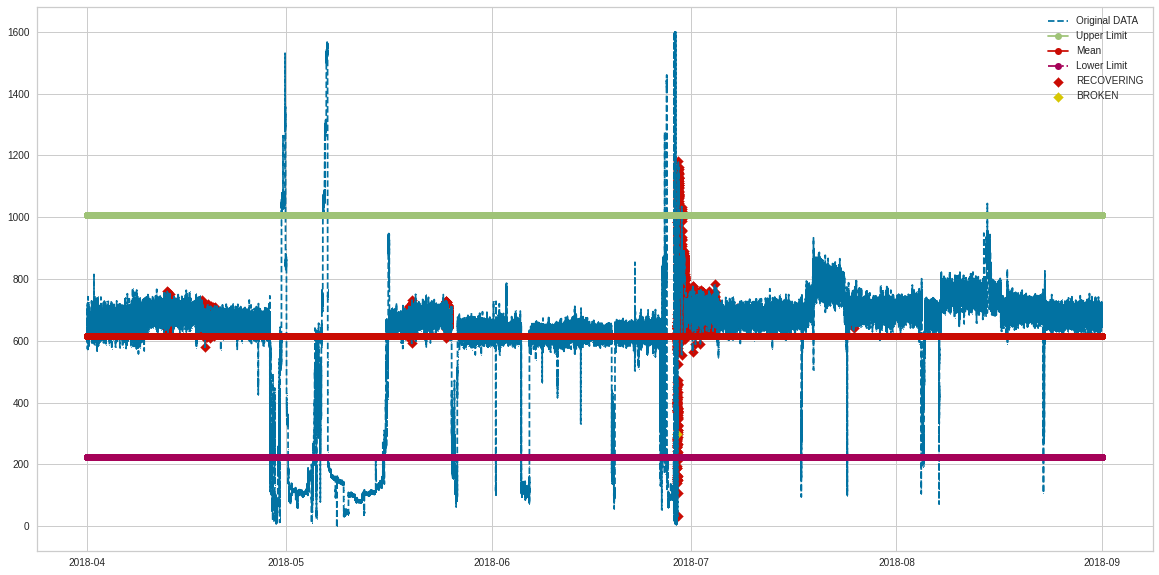

In [31]:

std = np.std(df[sensor_selected])
mean = np.mean(df[sensor_selected])
upper_limit = [mean + 2 * std] * len(df[sensor_selected])
lower_limit = [mean - 2 * std] * len(df[sensor_selected])
# print(upper_limit, lower_limit, mean, std)
plt.figure(figsize=(20,10))
plt.plot_date(df.index, df[sensor_selected], linestyle='--', markersize=0.7, label='Original DATA')
plt.plot_date(df.index, upper_limit, linestyle='-', label="Upper Limit")
plt.plot_date(df.index, [mean]*len(df[sensor_selected]), linestyle='-', label = "Mean")
plt.plot_date(df.index, lower_limit, linestyle='-.', label="Lower Limit")
plt.scatter(temp_df.index[temp_df["machine_status"] == "RECOVERING"], temp_df[temp_df["machine_status"] == "RECOVERING"]["sensor_30"], color='r', marker='D', zorder=2, label='RECOVERING')
plt.scatter(temp_df.index[temp_df["machine_status"] == "BROKEN"], temp_df[temp_df["machine_status"] == "BROKEN"]["sensor_30"], color='y', marker='D', zorder=2, label='BROKEN')

plt.legend()

### Adf calculations

In [32]:
# Required Libraries
from statsmodels.tsa.stattools import adfuller

In [34]:
def adf_calculation(col_name):
    adf_test = adfuller(col_name)
    adf_output = pd.Series(adf_test[0:4], index=["Test-Statistic", "p-value", "Lags Used", "Number of observations"])
    for key, value in adf_test[4].items():
        adf_output["critical_value (%s) "%key] = value
    print(adf_output)

* The p-value is well below 0.05. So this makes sure that the sensor values are stationary. 

In [35]:
adf_calculation(df["sensor_30"].dropna())

Test-Statistic           -7.849393e+00
p-value                   5.654350e-12
Lags Used                 8.300000e+01
Number of observations    2.199750e+05
critical_value (1%)      -3.430380e+00
critical_value (5%)      -2.861553e+00
critical_value (10%)     -2.566777e+00
dtype: float64


In [36]:
adf_calculation(df["sensor_11"].dropna())

Test-Statistic           -7.498931e+00
p-value                   4.304900e-11
Lags Used                 8.200000e+01
Number of observations    2.202180e+05
critical_value (1%)      -3.430380e+00
critical_value (5%)      -2.861553e+00
critical_value (10%)     -2.566777e+00
dtype: float64


In [37]:
adf_calculation(df["sensor_13"].dropna())

Test-Statistic           -9.408923e+00
p-value                   5.907292e-16
Lags Used                 8.200000e+01
Number of observations    2.202180e+05
critical_value (1%)      -3.430380e+00
critical_value (5%)      -2.861553e+00
critical_value (10%)     -2.566777e+00
dtype: float64


In [38]:
adf_calculation(df["sensor_17"].dropna())

Test-Statistic                -5.171112
p-value                        0.000010
Lags Used                     83.000000
Number of observations    220190.000000
critical_value (1%)           -3.430380
critical_value (5%)           -2.861553
critical_value (10%)          -2.566777
dtype: float64


## Detection of Anomaly using FB Prophet

### Prophet Sensor 11

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Fitting model...
Making predictions...
Plotting predictions...
Wall time: 7min 32s


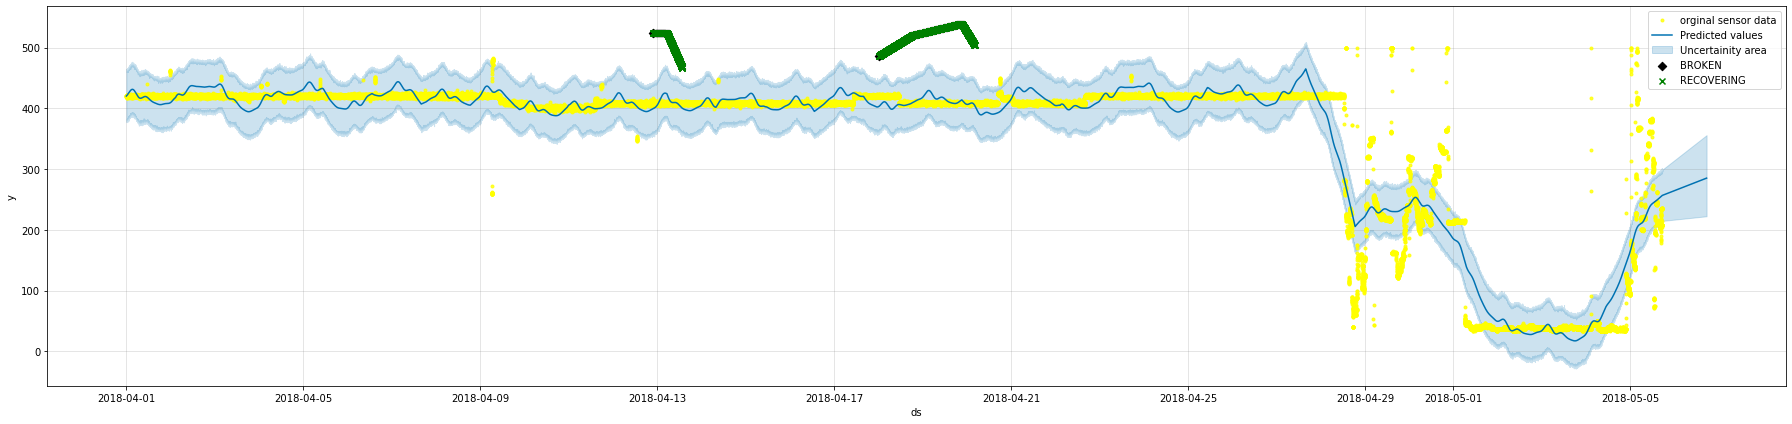

In [5]:
%%time 
plot_sensors("sensor_14")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 4min 3s, sys: 26.4 s, total: 4min 29s
Wall time: 4min 13s


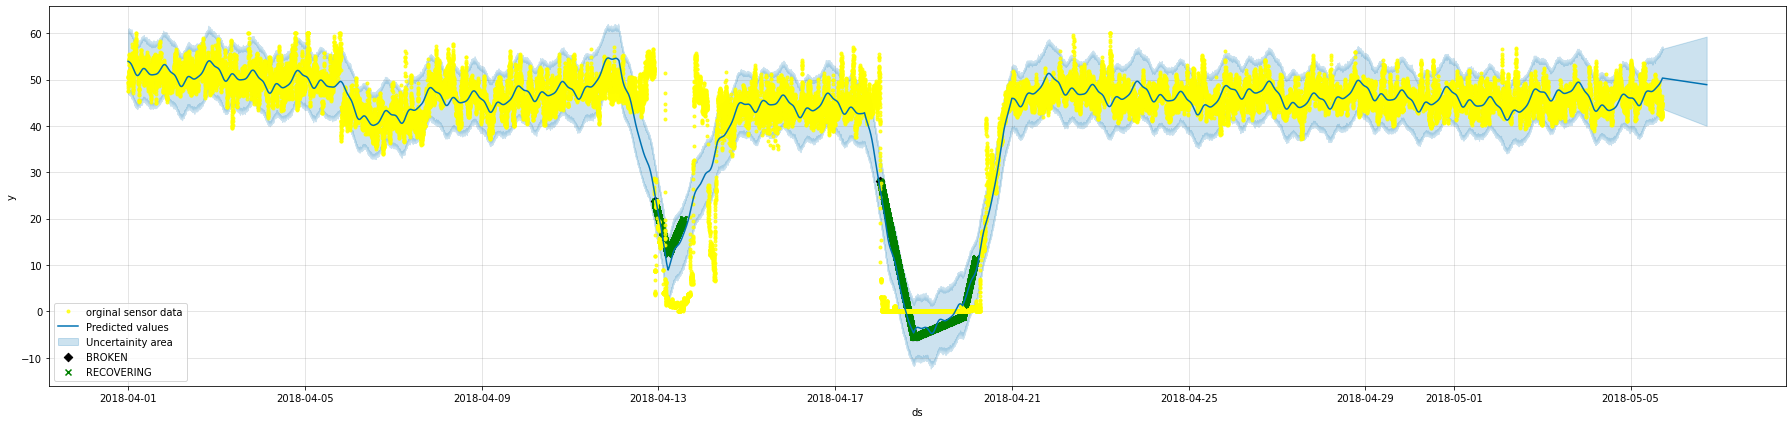

In [ ]:
%%time
plot_sensors("sensor_11")

### Prophet Sensor 12

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 3min 41s, sys: 23.6 s, total: 4min 4s
Wall time: 3min 42s


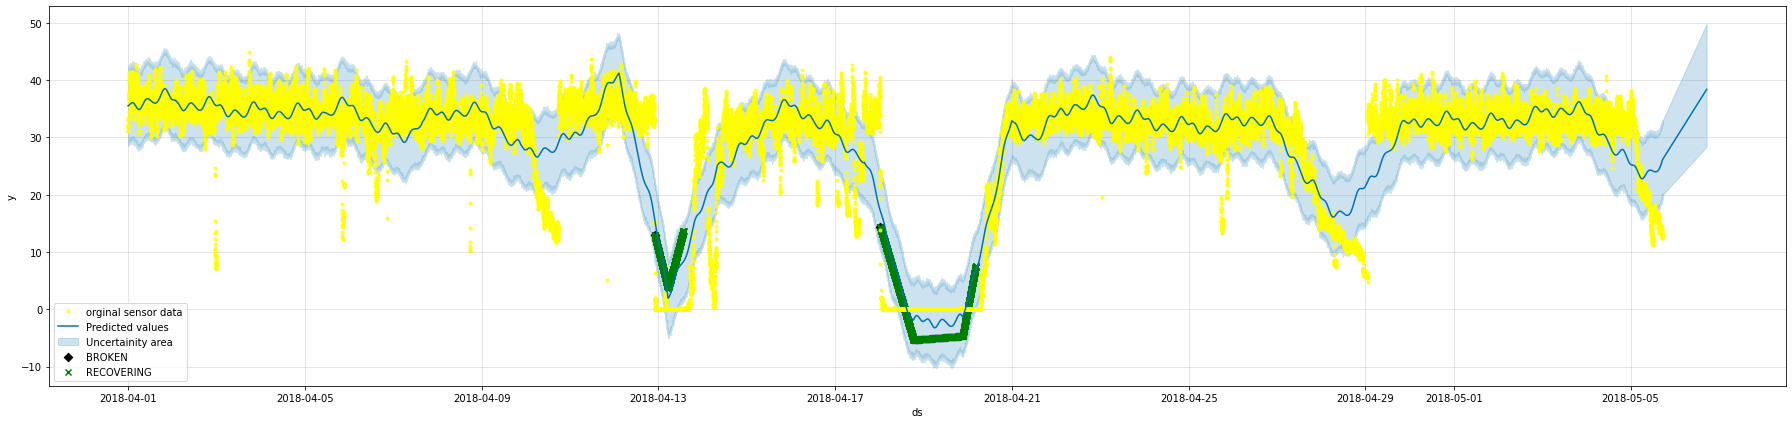

In [ ]:
%%time
plot_sensors("sensor_12")

### Prophet Sensor 13

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 2min 53s, sys: 21.7 s, total: 3min 15s
Wall time: 2min 59s


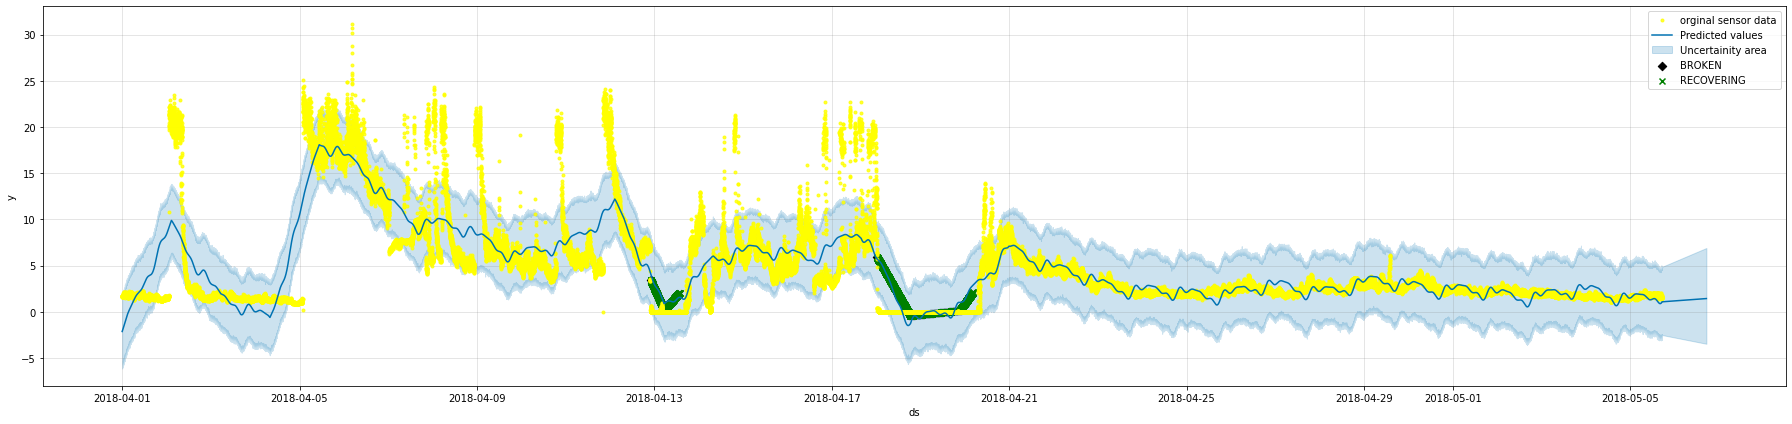

In [ ]:
%%time
plot_sensors("sensor_13")

### Prophet Sensor 17

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 3min 24s, sys: 23.3 s, total: 3min 47s
Wall time: 3min 25s


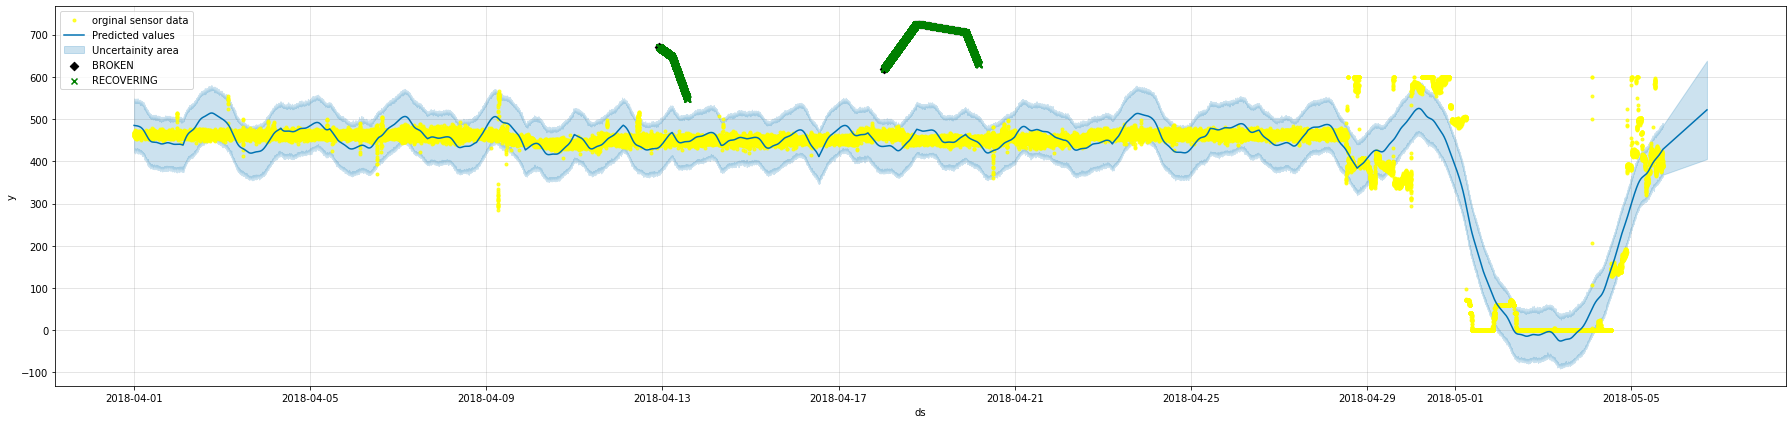

In [ ]:
%%time
plot_sensors("sensor_17")

### Prophet Sensor 18

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 3min 53s, sys: 23.9 s, total: 4min 17s
Wall time: 3min 55s


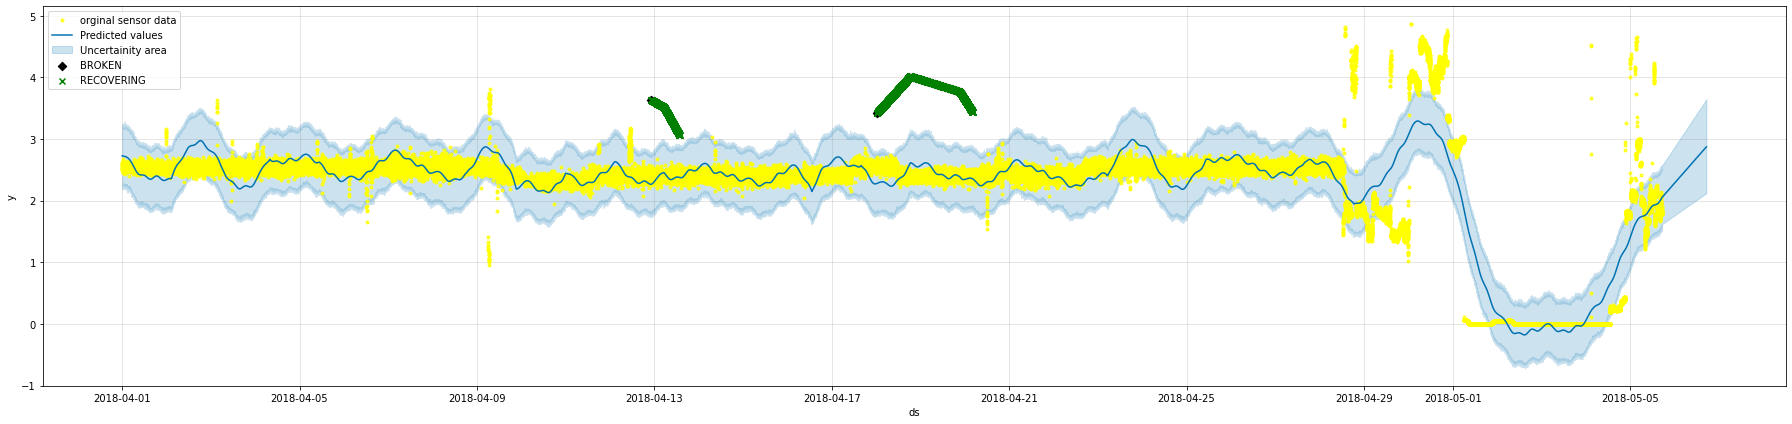

In [ ]:
%%time
plot_sensors("sensor_18")

### Prophet Sensor 19

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 3min 22s, sys: 22.2 s, total: 3min 44s
Wall time: 3min 22s


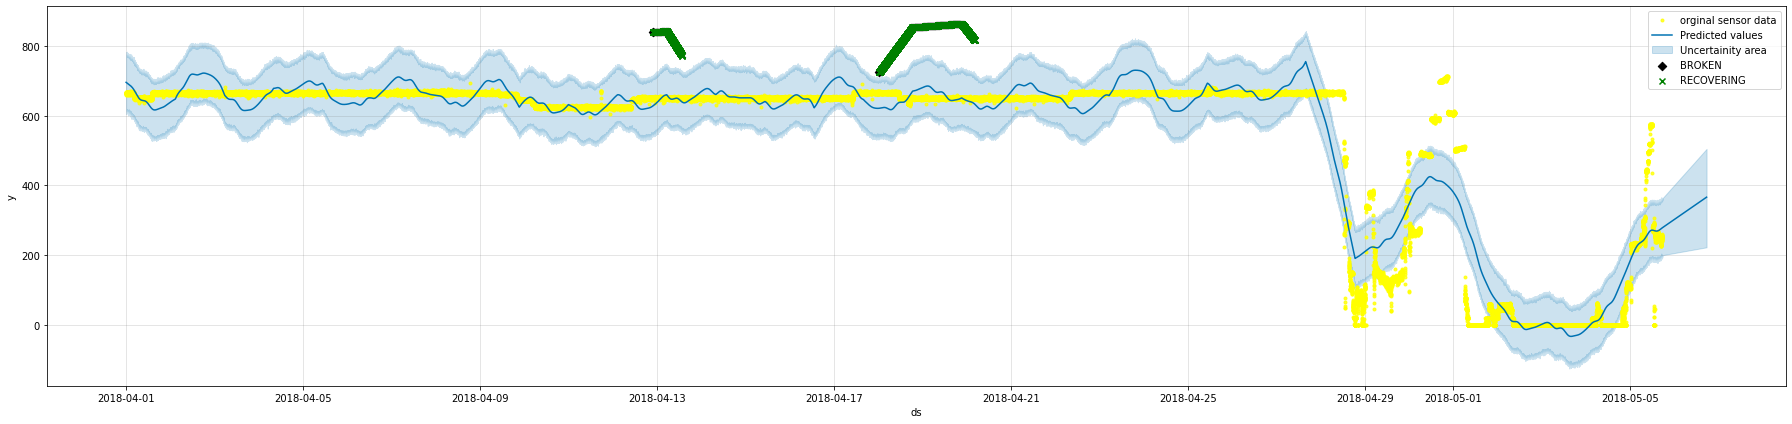

In [ ]:
%%time
plot_sensors("sensor_19")

### Prophet Sensor 20

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 3min 39s, sys: 20.7 s, total: 3min 59s
Wall time: 3min 38s


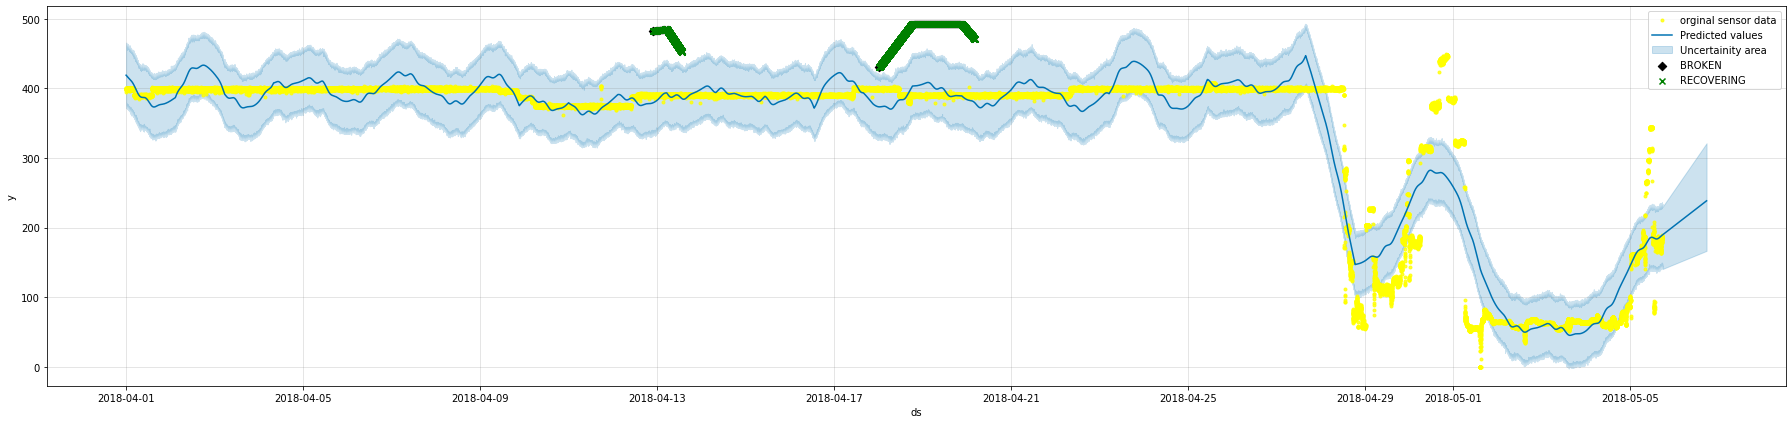

In [ ]:
%%time
plot_sensors("sensor_20")

### Prophet Sensor 08

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


CPU times: user 2min 56s, sys: 21.1 s, total: 3min 17s
Wall time: 3min 1s


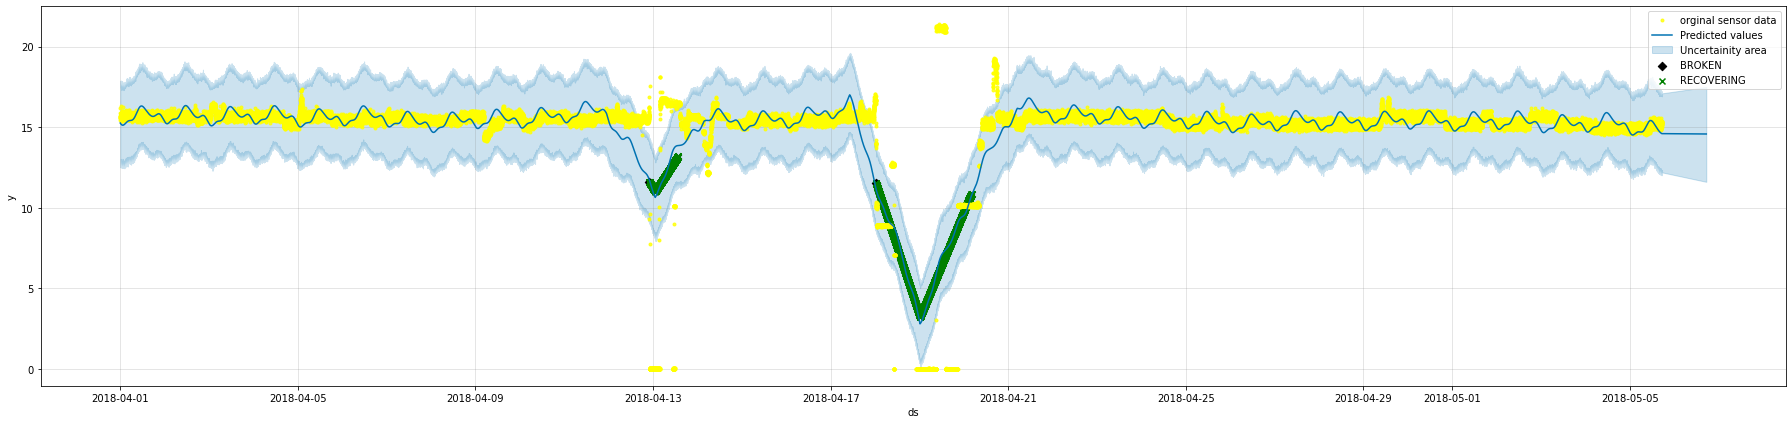

In [ ]:
%%time
plot_sensors("sensor_08")

## Detection of Anomaly using Alibi_detect

In [1]:
from utils import plot_sensors, alibi_anomaly_detection

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Read dataset...


Executing Spectral Residual method... 
Plotting finished
Wall time: 3.32 s


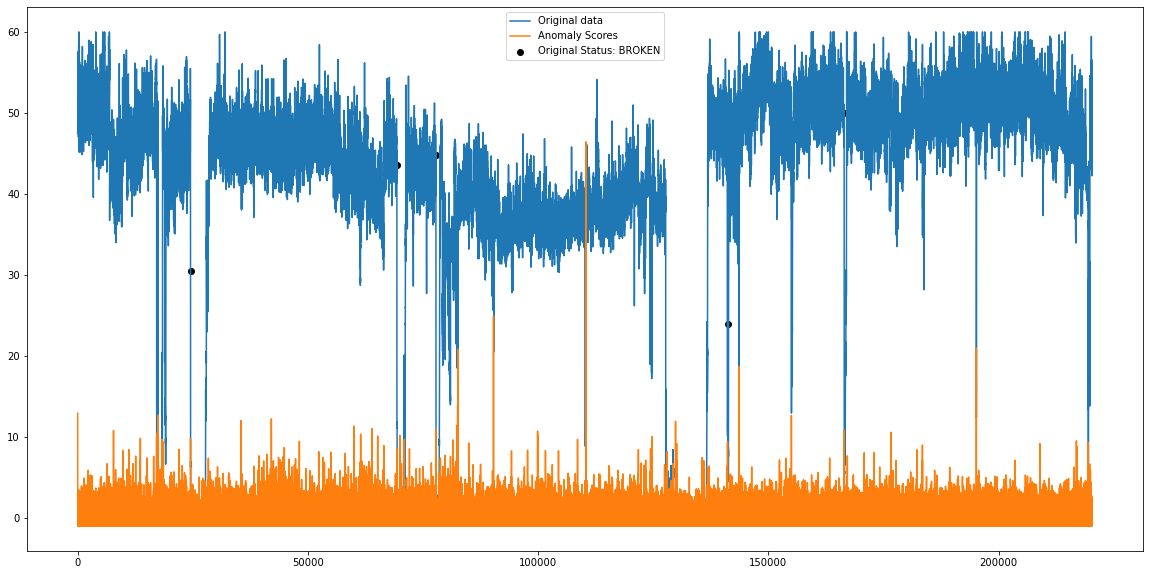

In [2]:
%%time
alibi_anomaly_detection(sensor_name="sensor_11")

### Alibi Sensor 11: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.2 s


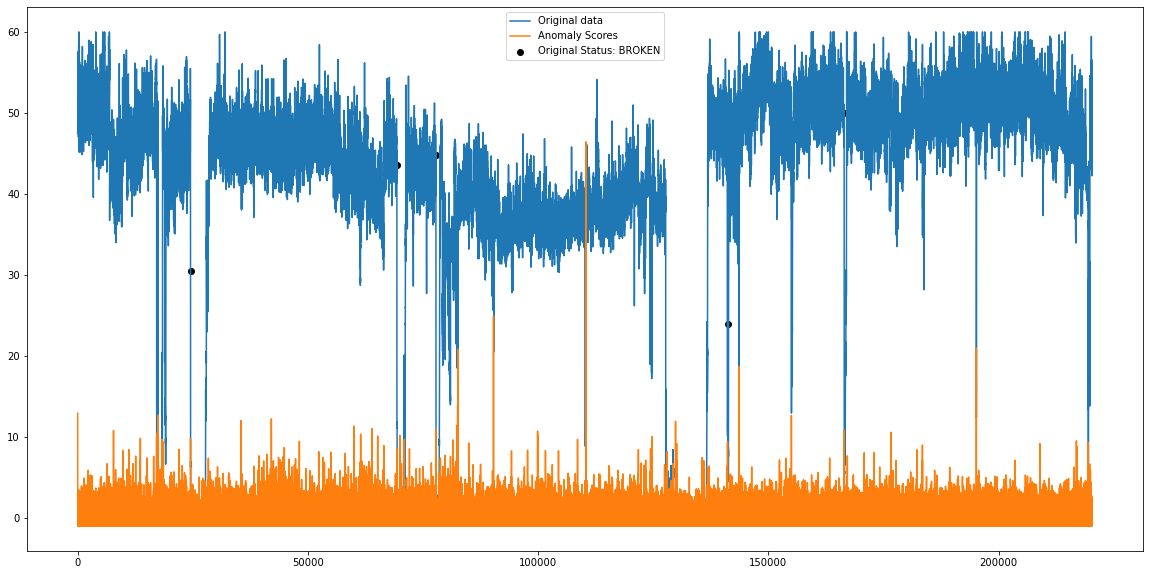

In [3]:
%%time
alibi_anomaly_detection(sensor_name="sensor_11")

### Alibi Sensor 12: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.59 s


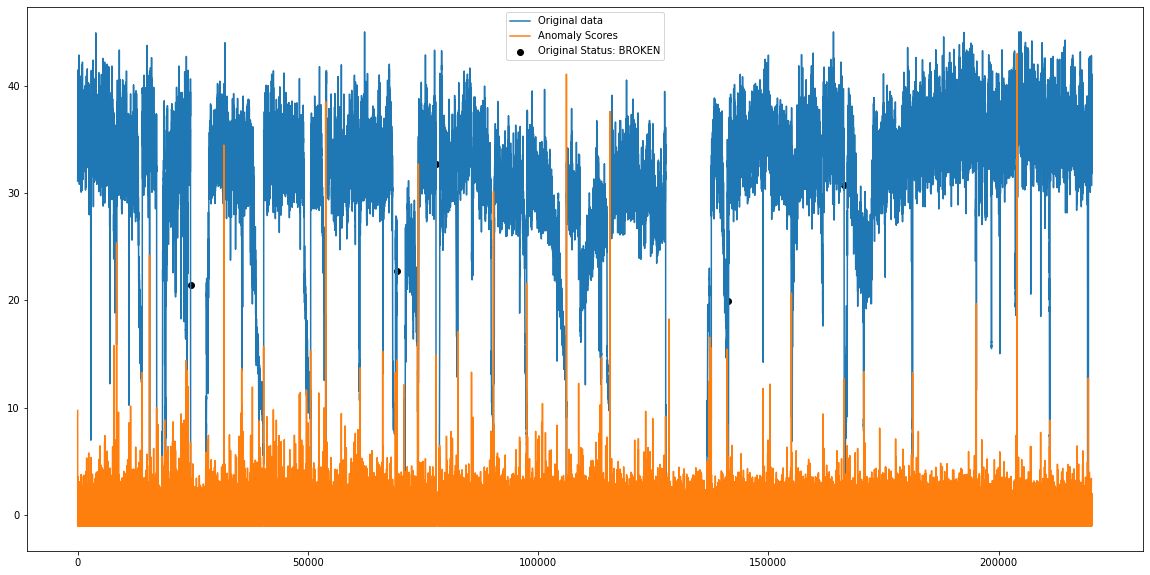

In [4]:
%%time
alibi_anomaly_detection(sensor_name="sensor_12")

### Alibi Sensor 13: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.34 s


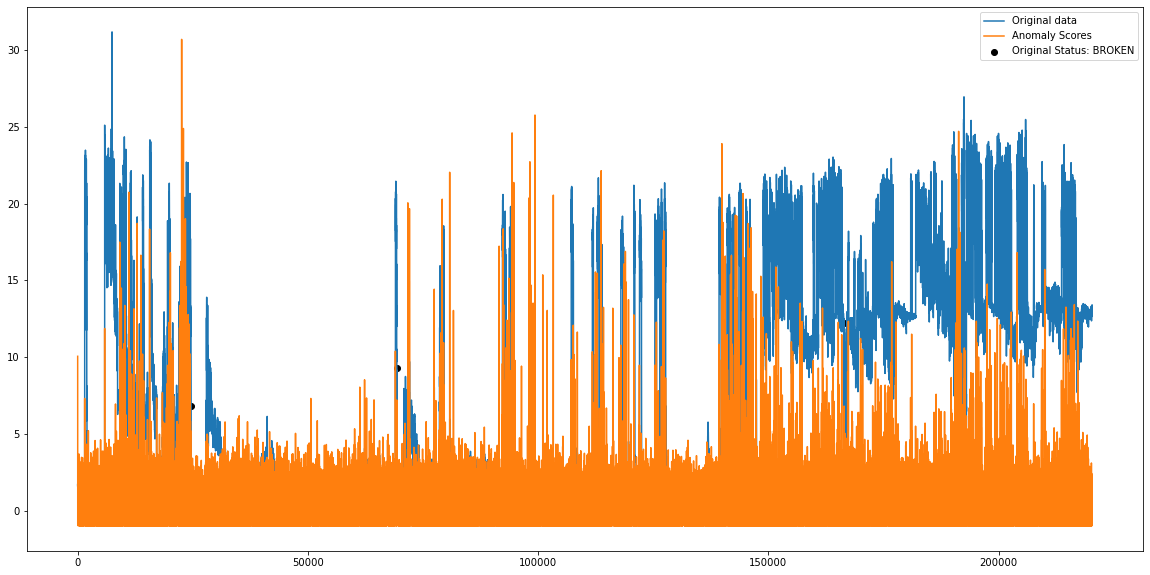

In [5]:
%%time
alibi_anomaly_detection(sensor_name="sensor_13")

### Alibi Sensor 17: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.69 s


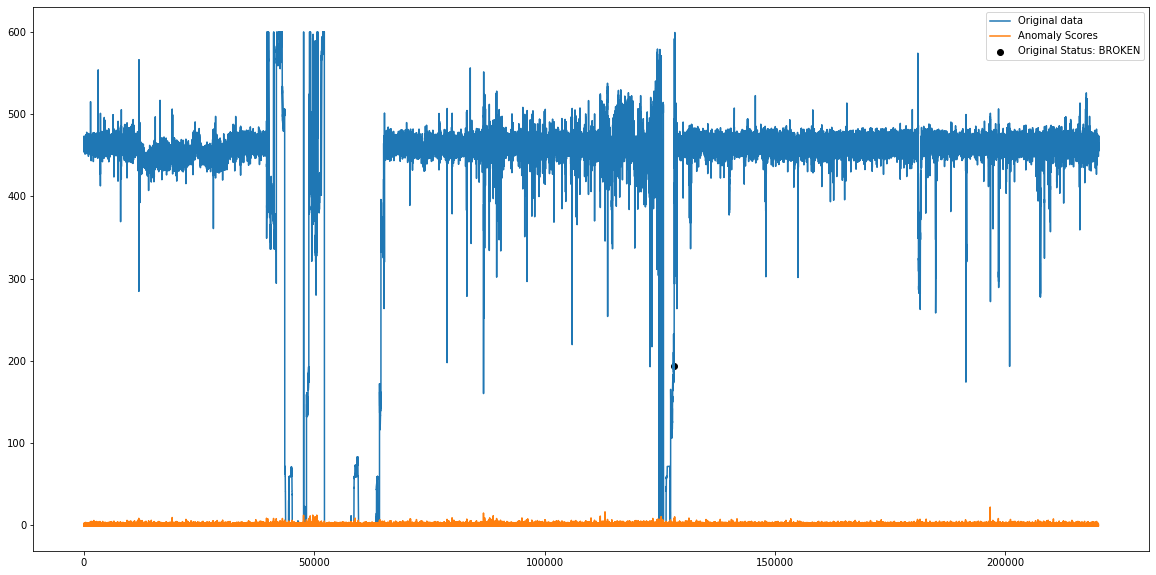

In [6]:
%%time
alibi_anomaly_detection(sensor_name="sensor_17")

### Alibi Sensor 18: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.41 s


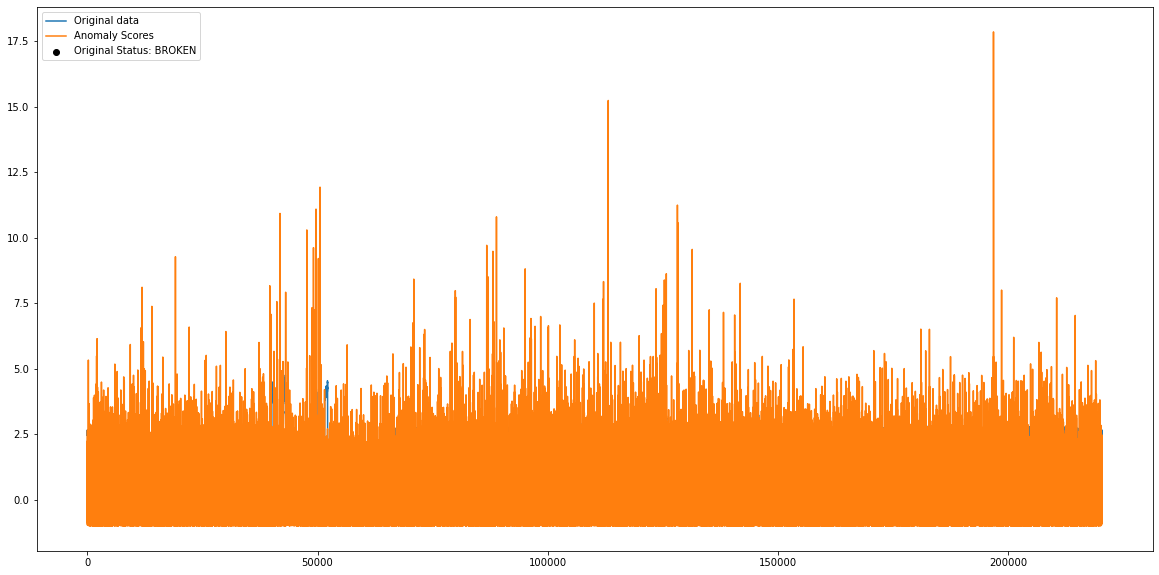

In [7]:
%%time
alibi_anomaly_detection(sensor_name="sensor_18")

### Alibi Sensor 19: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 4.53 s


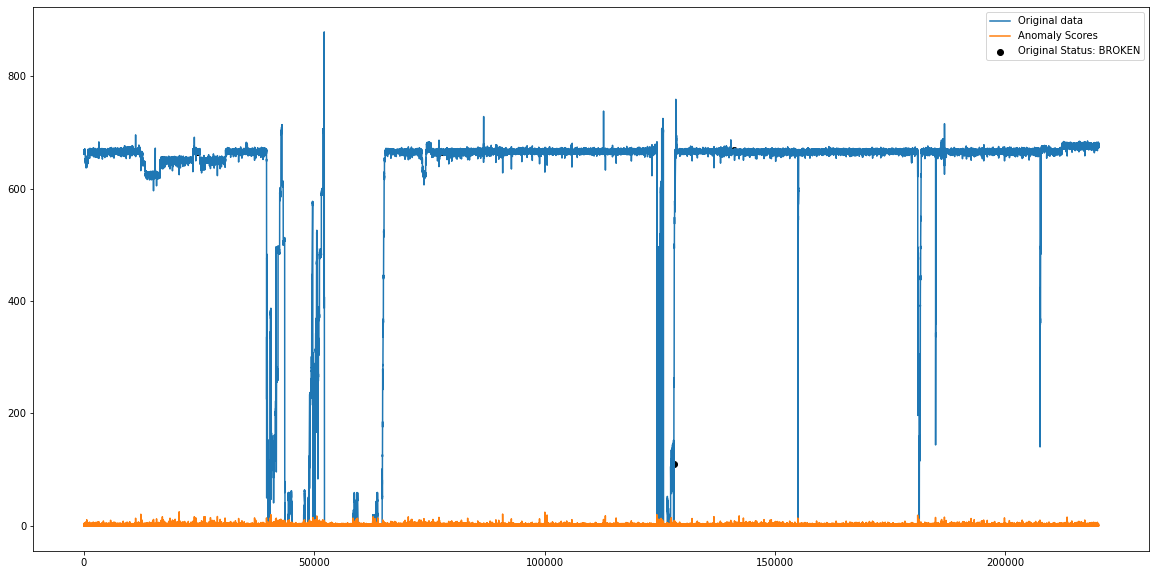

In [8]:
%%time
alibi_anomaly_detection(sensor_name="sensor_19")

### Alibi Sensor 20: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.42 s


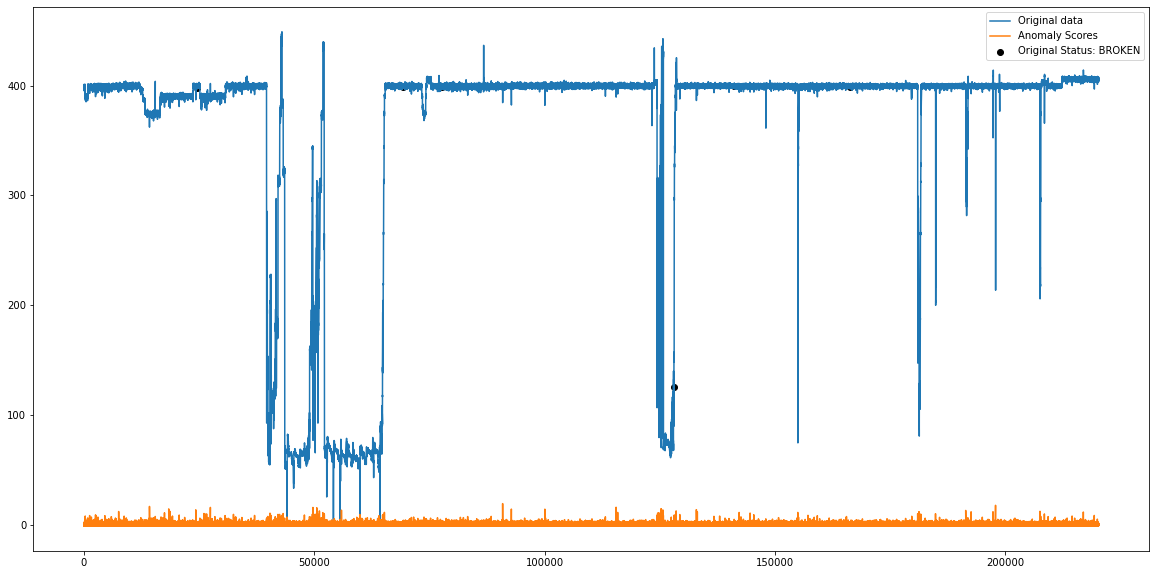

In [9]:
%%time
alibi_anomaly_detection(sensor_name="sensor_20")

### Alibi Sensor 08: Spectral Residual

Executing Spectral Residual method... 
Plotting finished
Wall time: 3.61 s


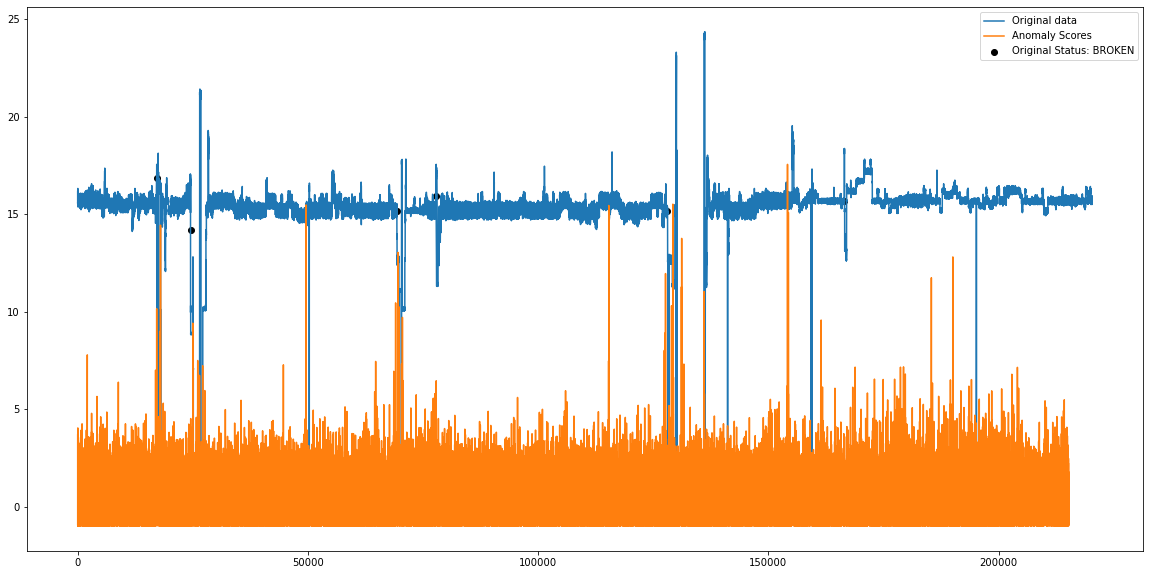

In [10]:
%%time
alibi_anomaly_detection(sensor_name="sensor_08")

## Anomaly detection using PyCaret


### Loading the dataset

In [ ]:
from pycaret.anomaly import *
df = pd.read_csv("/content/drive/MyDrive/Colab_datasets/sensor.csv", parse_dates=["timestamp"], index_col= "timestamp")
s = setup(df, session_id = 123)
print("Finished loading..")

### Training IForest model

In [10]:
%%time
iforest_results = train_pycaret_anomaly_model("iforest")

CPU times: user 24.1 s, sys: 487 ms, total: 24.6 s
Wall time: 30.8 s


* Graph of sensor 20 iforest

CPU times: user 10.6 s, sys: 56.3 ms, total: 10.6 s
Wall time: 11.5 s


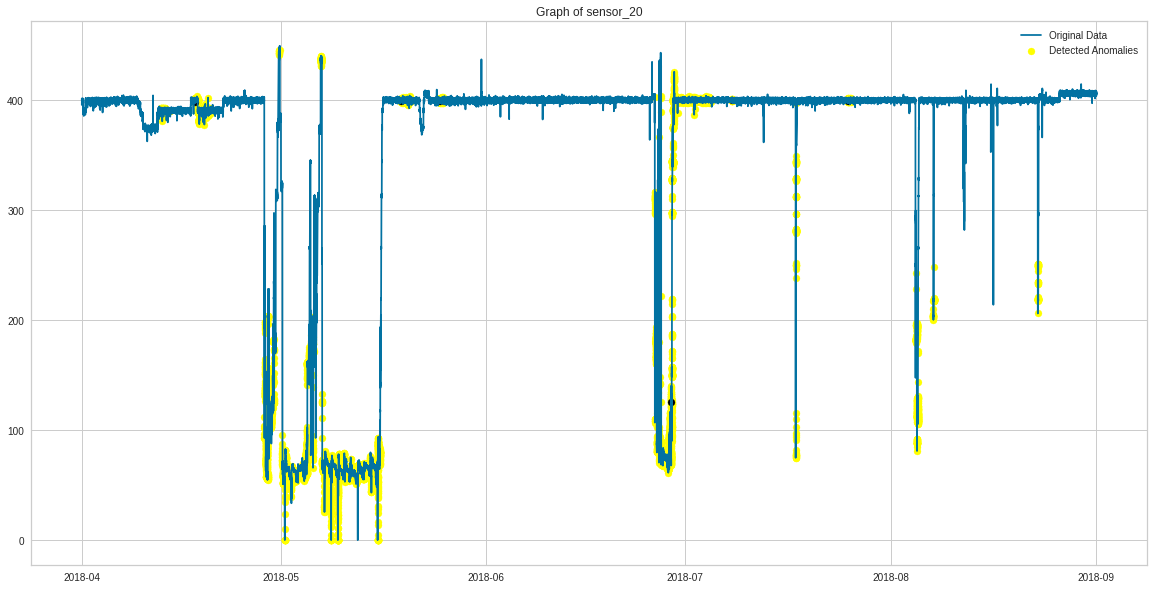

In [12]:
%%time
make_pycaret_chart("sensor_20", iforest_results)

* Graph Sensor 11 IForest

CPU times: user 10.1 s, sys: 23.4 ms, total: 10.2 s
Wall time: 10.5 s


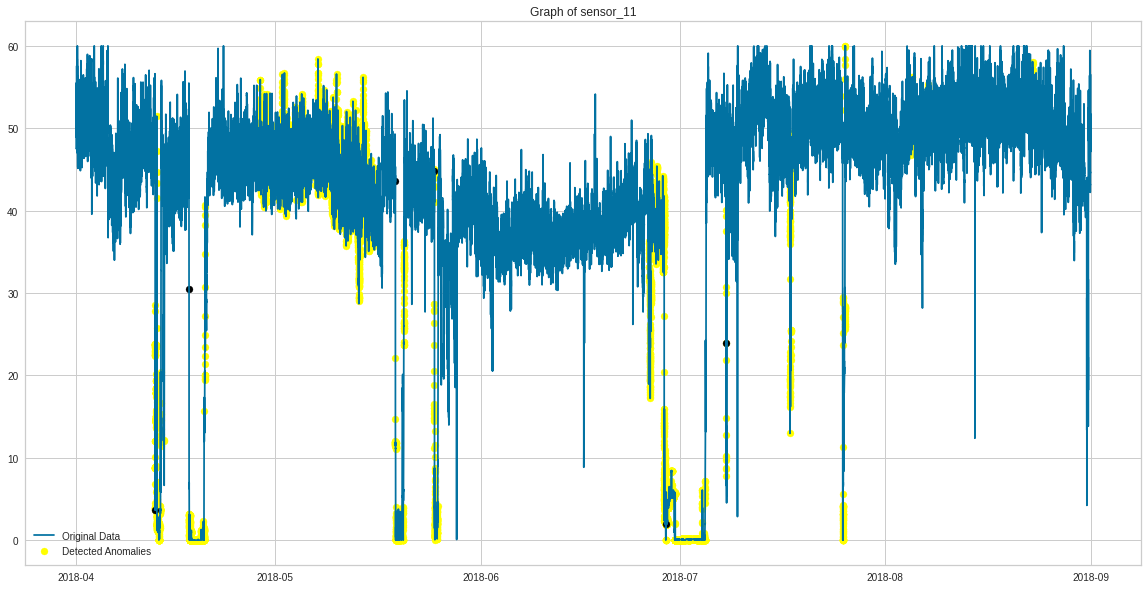

In [13]:
%%time
make_pycaret_chart("sensor_11", iforest_results)

* Graph of sensor 12 iforest

CPU times: user 10.4 s, sys: 47.2 ms, total: 10.4 s
Wall time: 11.3 s


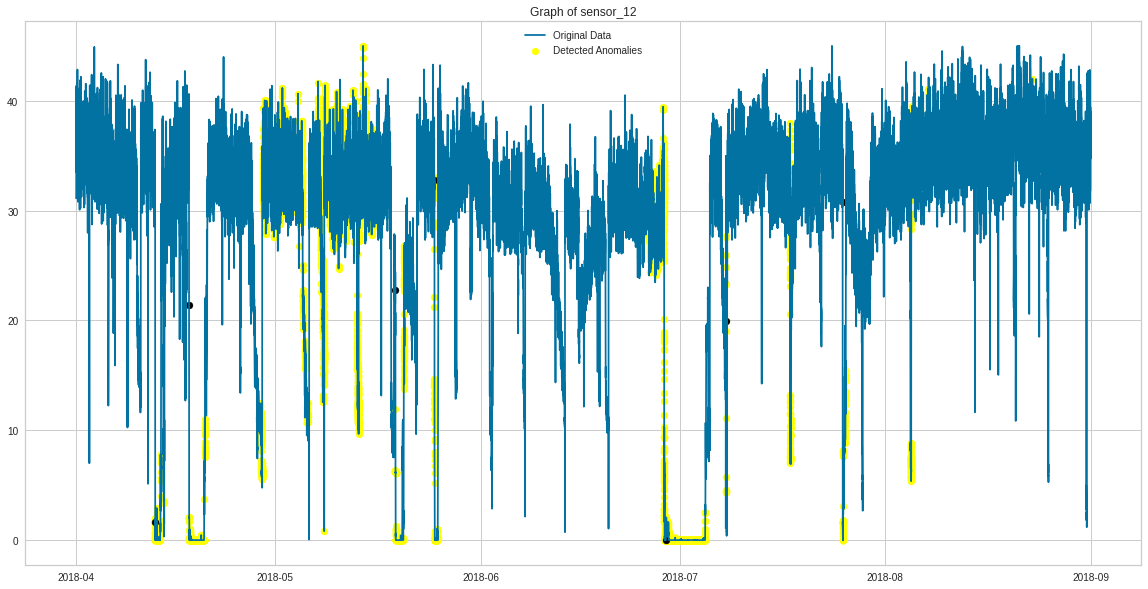

In [14]:
%%time 
make_pycaret_chart("sensor_12", iforest_results)

* Graph of sensor 17 iforest

CPU times: user 10.4 s, sys: 30.1 ms, total: 10.4 s
Wall time: 11 s


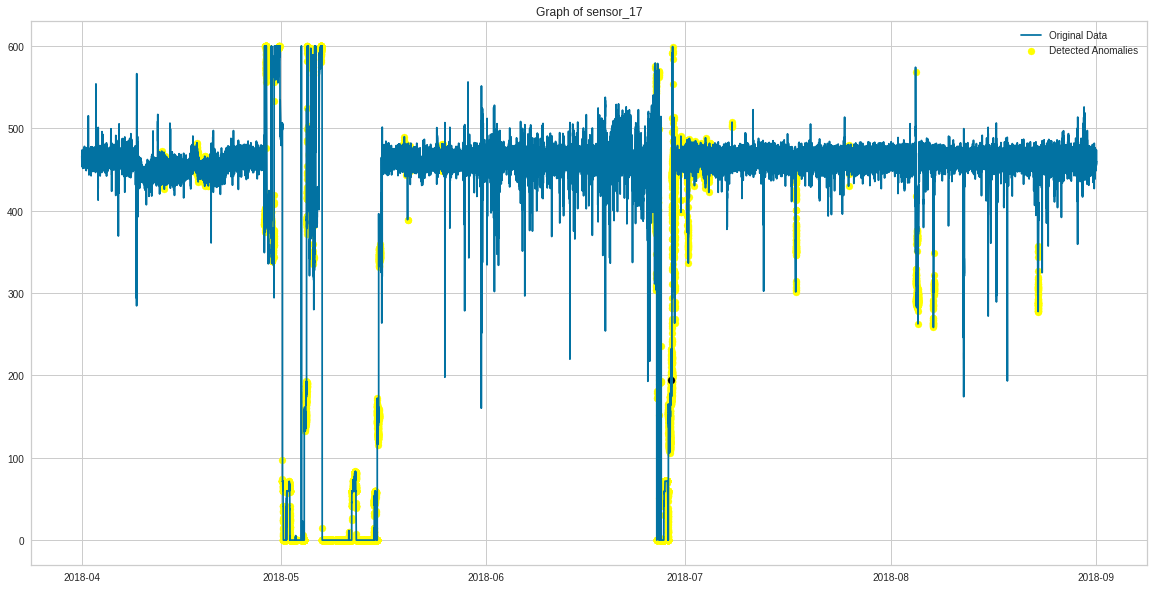

In [15]:
%%time
make_pycaret_chart("sensor_17", iforest_results)

### IForest accuracy

In [16]:
iforest_accuracy = calculate_accuracy(iforest_results)
print("Accuracy of IForest", iforest_accuracy)

Accuracy:  0.9220679012345679
Accuracy of IForest 0.9220679012345679


### Training Clustering based local outlier

In [17]:
%%time
cluster_results = train_pycaret_anomaly_model("cluster")

CPU times: user 22.6 s, sys: 1.66 s, total: 24.3 s
Wall time: 21.1 s


* Graph of sensor 20 cluster

CPU times: user 10.4 s, sys: 95.4 ms, total: 10.5 s
Wall time: 11.4 s


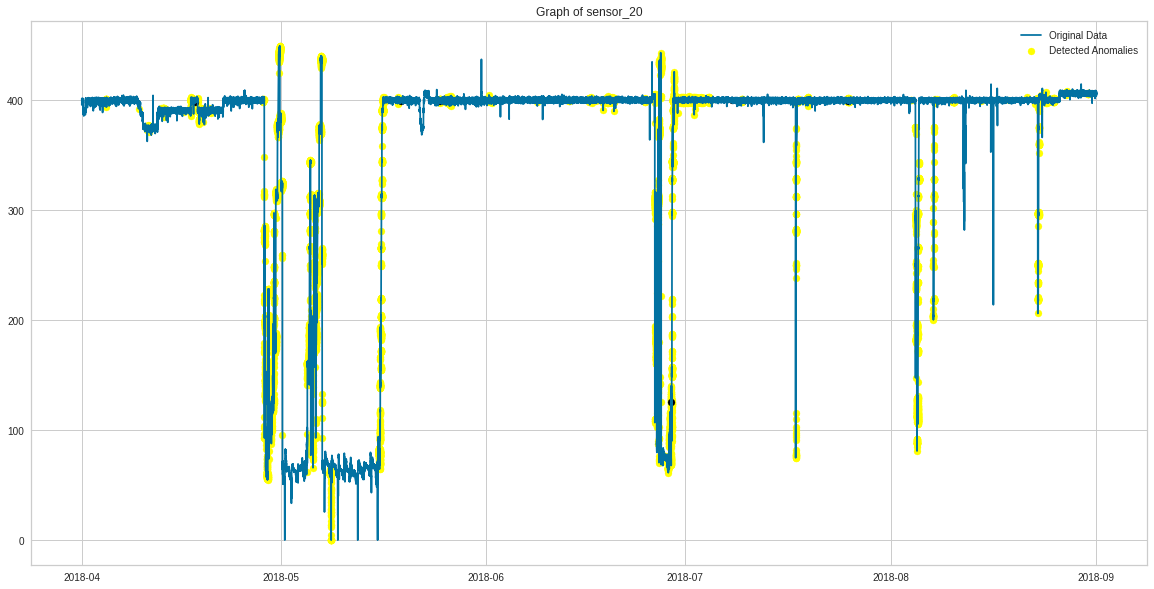

In [18]:
%%time
make_pycaret_chart("sensor_20", cluster_results)

* Graph of sensor 12 cluster

CPU times: user 10.7 s, sys: 26.3 ms, total: 10.7 s
Wall time: 11.6 s


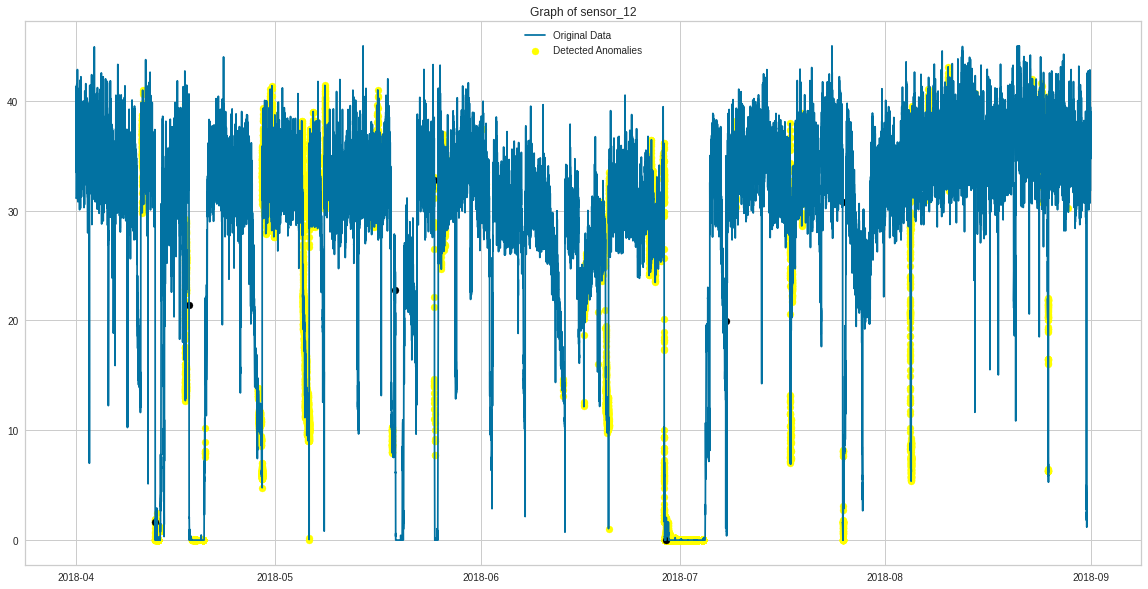

In [22]:
%%time 
make_pycaret_chart("sensor_12", cluster_results)

* Graph of sensor 17 cluster

CPU times: user 10.5 s, sys: 34 ms, total: 10.5 s
Wall time: 12.6 s


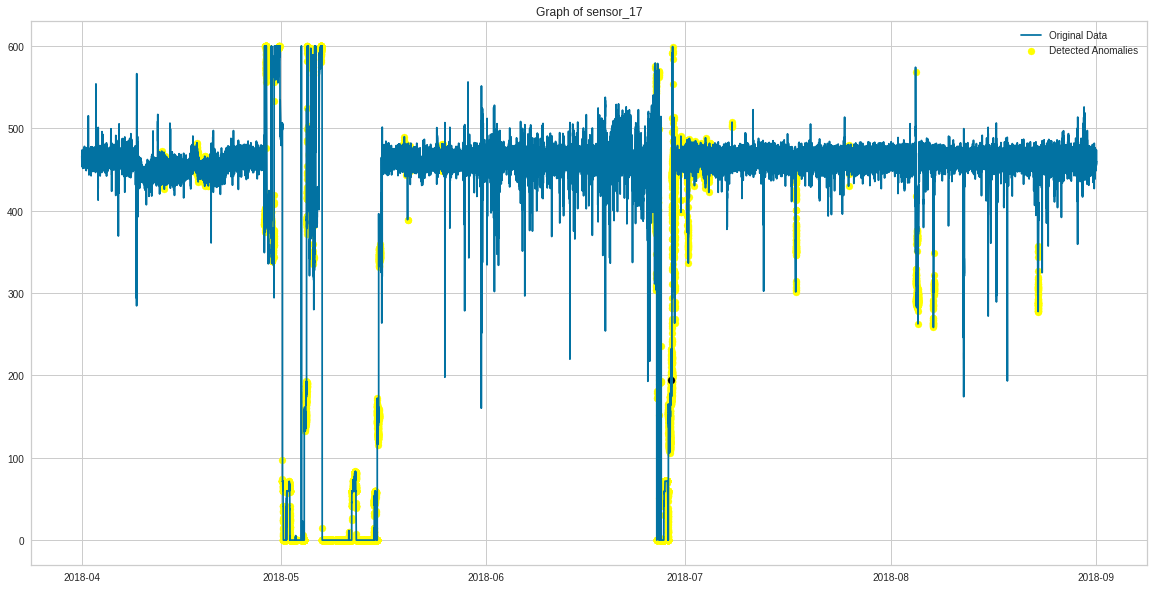

In [21]:
%%time
make_pycaret_chart("sensor_17", cluster_results)

### Evaluating Cluster algorithm

In [24]:
cluster_accuracy = calculate_accuracy(cluster_results)
print("Accuracy of Cluster outliers", cluster_accuracy)

Accuracy:  0.9037763253449528
Accuracy of Cluster outliers 0.9037763253449528
